<a href="https://colab.research.google.com/github/2403A52284/Batch-11-12/blob/main/correlation_%26_relations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

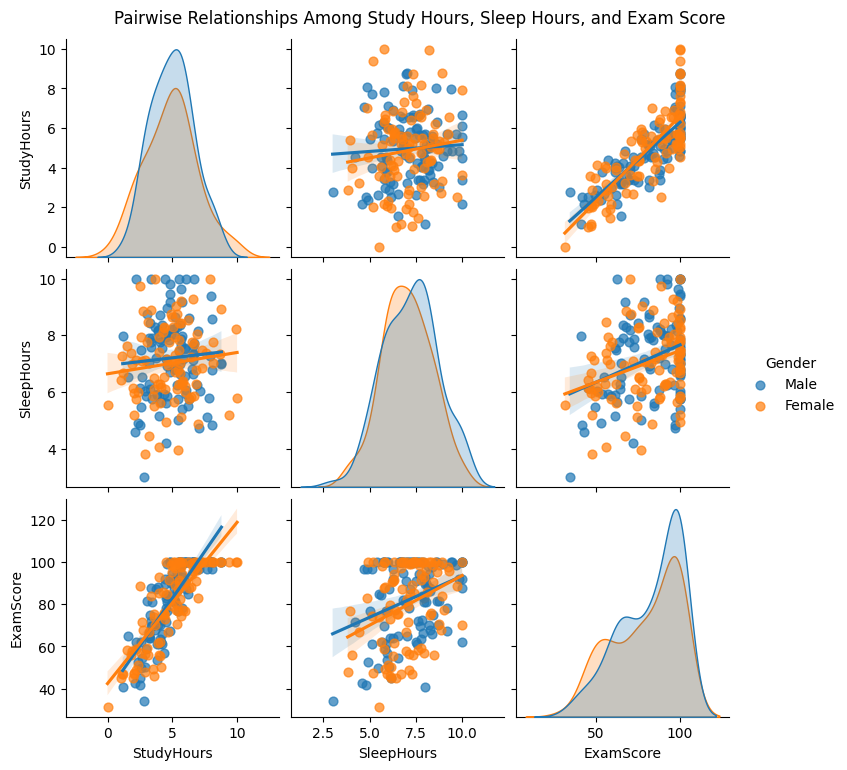

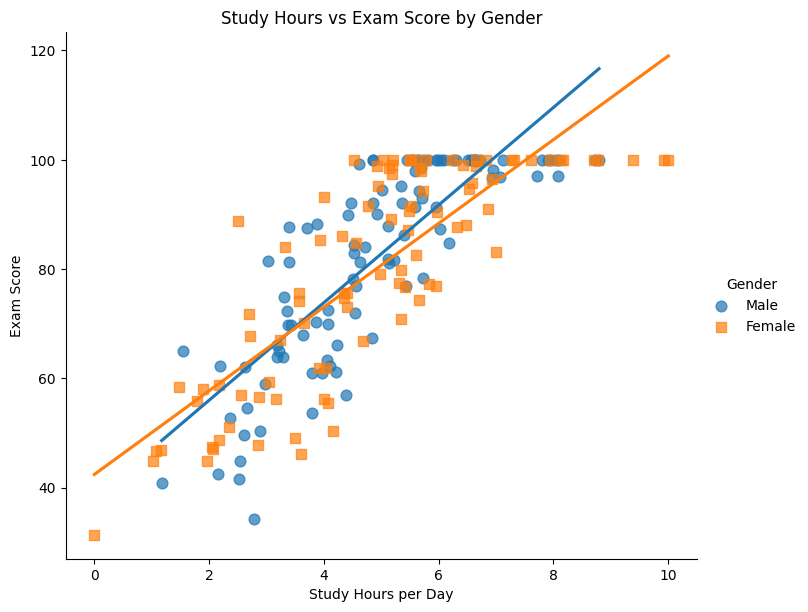

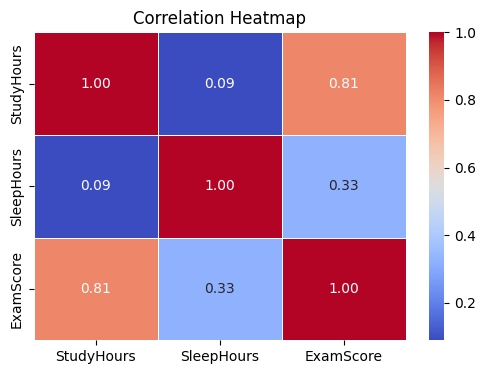

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -----------------------------
# Step 1: Create sample dataset
# -----------------------------
np.random.seed(42)  # For reproducibility

n = 200
df = pd.DataFrame({
    "StudyHours": np.random.normal(5, 2, n).clip(0, 10),
    "SleepHours": np.random.normal(7, 1.5, n).clip(3, 10),
    "Gender": np.random.choice(["Male", "Female"], n)
})

# Assume: Exam score depends on study + sleep (with some noise)
df["ExamScore"] = (
    10 * df["StudyHours"] +
    5 * df["SleepHours"] +
    np.random.normal(0, 10, n)
).clip(0, 100)

# -----------------------------
# Step 2: Pairplot - overview
# -----------------------------
sns.pairplot(
    df,
    vars=["StudyHours", "SleepHours", "ExamScore"],
    hue="Gender",
    kind="reg",          # Adds regression lines
    diag_kind="kde",     # KDE for diagonal plots
    plot_kws={"scatter_kws": {"alpha": 0.7, "s": 40}}
)
plt.suptitle("Pairwise Relationships Among Study Hours, Sleep Hours, and Exam Score", y=1.02)
plt.show()

# -----------------------------
# Step 3: Focused scatter plot with regression
# -----------------------------
sns.lmplot(
    x="StudyHours",
    y="ExamScore",
    hue="Gender",
    markers=["o", "s"],
    data=df,
    height=6,
    aspect=1.2,
    ci=None,
    scatter_kws={"alpha": 0.7, "s": 60}
)
plt.title("Study Hours vs Exam Score by Gender")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.show()

# -----------------------------
# Step 4: Correlation Heatmap
# -----------------------------
corr = df[["StudyHours", "SleepHours", "ExamScore"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
